# <center>Machine Learning</center>
## <center>Assignment 1</center>
__<center>Due: July 8, 2018 </center>__

# 1. Linear and polynomial regression

In [29]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
# plt.style.use('fivethirtyeight')

## 1.a

In [30]:
x = np.loadtxt('./data/hw1x.dat')
y = np.loadtxt('./data/h1wy.dat')

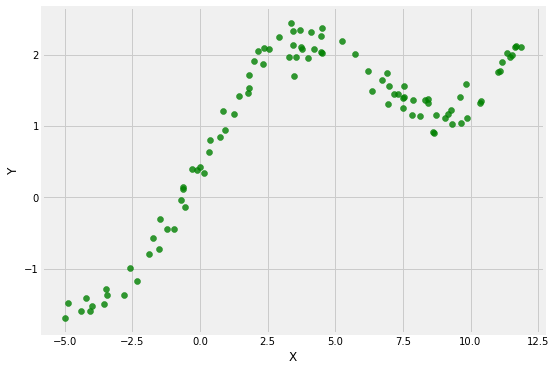

In [33]:
plt.figure(figsize=(8,6))
plt.scatter(x, y, c='g', alpha=0.8)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

## 1.b 

In [34]:
ones = np.ones(len(x))
new_x = np.c_[x, ones]

In [35]:
xtx = np.dot(new_x.T, new_x)
xty = np.dot(new_x.T, y)

In [36]:
w = np.dot(np.linalg.inv(xtx), xty)
w

array([ 0.17531122,  0.32767539])

In [37]:
y_pred = w[0]* x + w[1]

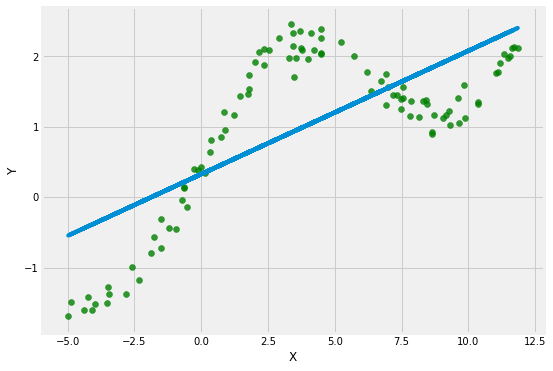

In [38]:
plt.figure(figsize=(8,6))
plt.plot(x, y_pred)
plt.scatter(x, y, c='g', alpha=0.8)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

## 1.c

In [9]:
def mean_squared_error(y_true, y_pred):
    errors = np.mean((y_true - y_pred) ** 2)
    return errors

def mean_absolute_error(y_true, y_pred):
    errors = np.mean(np.abs(y_true - y_pred))
    return errors

def root_mean_squared_error(y_true, y_pred):
    errors = np.sqrt(np.mean((y_true - y_pred) ** 2))
    return errors
                     
def sum_of_squared_error(y_true, y_pred):
    errors = np.sum((y_true - y_pred) ** 2)
    return errors

def r2_score(y_true, y_pred):
    errors = 1 - (np.sum((y_true - np.mean(y_true)) ** 2))/(np.sum((y_true - y_pred) ** 2))
    return errors

In [17]:
print('mean_squared_error: ', mean_squared_error(y, y_pred))
print('mean_absolute_error: ', mean_absolute_error(y, y_pred))
print('root_mean_squared_error: ', root_mean_squared_error(y, y_pred))
print('sum_of_squared_error: ', sum_of_squared_error(y, y_pred))
print('r2_score: ', r2_score(y, y_pred))

mean_squared_error:  0.66672890687
mean_absolute_error:  0.70680308816
root_mean_squared_error:  0.816534694223
sum_of_squared_error:  66.672890687
r2_score:  -1.04621306151
